# VT2

In [1]:
# Import of Packages
import numpy as np
import pandas as pd
import statistics as st
import time

# Import of Packages for Functions
import math
import matplotlib.pyplot as plt
import sys

# Importing the Functions File
import Functions_VT2 as fn

# Start of Timer to Measure Runtime
start_time = time.time()

## Scenario Generation

In [2]:
# Demand at t0
Dt0 = 22561132
# Steptime in Years
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

# Parameters
mu = 0.042754330256447565
sigma = 0.05813761525452841

### Plotting the Scenarios

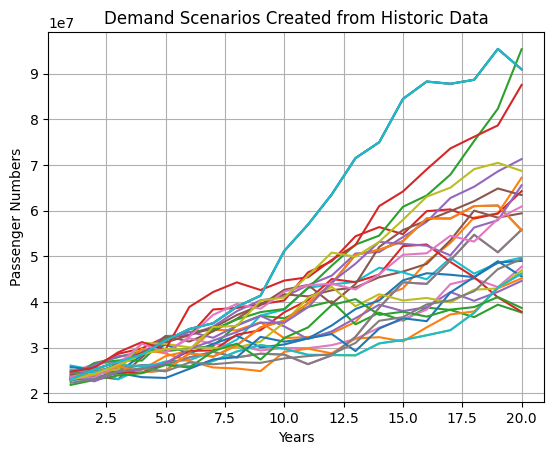

<Figure size 640x480 with 0 Axes>

In [3]:
# Calling the Scenario Creation Function
Scenarios = fn.generate_scenarios(mu, sigma, Dt0, dt, Fth, Forecasts)

# Round values up for further Calculation
D = np.ceil(Scenarios)
# print(D)


# Calling the Scenario Plotting Function
fn.Scenario_plot(
    Scenarios,
    Fth,
    True,
    "Demand Scenarios Created from Historic Data",
    "Passenger Numbers",
    30,
)

# print(np.shape(Scenarios))
# print(Scenarios)

Geometric Brownian motion Formula

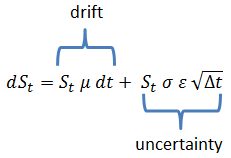

## Estimation of Dockstand Demand

In [4]:
# Percentage of Pax using Dock Stands rather than Bus Gates
p_dock = 0.8
# Percentage of Pax travelling within Schengen Area
p_schengen = 0.8
# Percentage of Pax travelling from Dock
p_Dok_A_B = 0.5
# average number of passengers carried per air traffic movement
PAXATM = 114

# Demand at design Hour
D_per_hour = D / (365 * 17)

# Contact Stand Demand (ZRH has 75, but not all can be used at once)
# Dock A has 17 Contact and 16 Bus Gates

d = (D_per_hour * p_dock * p_schengen * p_Dok_A_B) / PAXATM

# print("Contact Stand demad d: ", d)

### Plotting the Dockstand demand

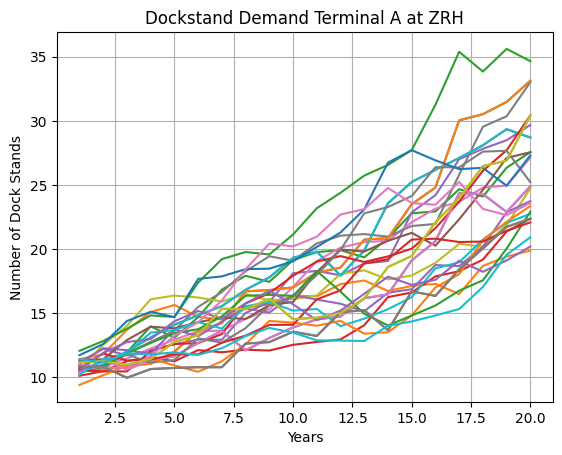

<Figure size 640x480 with 0 Axes>

In [5]:
# Calling the Scenario Plotting Function
fn.Scenario_plot(
    d,
    Fth,
    True,
    "Dockstand Demand Terminal A at ZRH",
    "Number of Dock Stands",
    30,
)

## Calulation of the NPV

In [6]:
def Revenue(K, D, r_k, r_D):
    """_summary_

    Args:
        K (_type_): _description_
        D (_type_): _description_
        r_k (_type_): _description_
        r_D (_type_): _description_
    """
    R = K * r_k + D * r_D
    return R


def Cost(K, D, d, EoS, ci_K, delta_K0, h, co_D, co_K):
    """_summary_

    Args:
        K (_type_): _description_
        D (_type_): _description_
        d (_type_): _description_
        EoS (_type_): _description_
        ci_K (_type_): _description_
        delta_K0 (_type_): _description_
        h (_type_): _description_
        co_D (_type_): _description_
        co_K (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Creation of a Capacity Change Vector
    delta_K0 = np.diff(K)
    # Setting the initial Value of the Change Vector to Zero
    delta_K = np.insert(delta_K0, 0, 0)

    # Penalty Cost
    cp = 100
    # Calculate the Difference Matrix
    diff = D - K
    # Create an Index Matrix with the Condition for undercapacity
    undercapacity = np.greater(diff, 0).astype(int)

    C = (
        ((ci_K * np.abs(delta_K) ** EoS) / h)
        + (co_D * D + co_K * K)
        + undercapacity * cp
    )

    return C


def NPV_calculation(Revenue, Cost):
    """
    Args:
        Revenue (_type_): _description_
        Cost (_type_): _description_
    """
    Summe = Revenue - Cost
    NPV = np.sum(Summe, axis=1)
    return NPV

In [7]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 30  # Operational costs per unit of capacity per period
co_D = 1  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor
delta_K0 = 0
h = 1

# Definition of a Capacity Vector
K_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

D_rounded = np.ceil(D / 1000000)

Rev = Revenue(K_rounded, D, r_K, r_D)

Cos = Cost(K_rounded, D_rounded, d, EoS, ci_K, delta_K0, h, co_D, co_K)
print(Cos)

NPV1 = NPV_calculation(Rev, Cos)
print(NPV1)

# ENPV = sum(NPV1)
# print("ENPV: ", ENPV)

[[ 876.  877.  877. ... 1541. 1543. 1546.]
 [ 773.  775.  878. ... 1541. 1547. 1651.]
 [ 774.  774.  774. ... 1658. 1662. 1668.]
 ...
 [ 877.  876.  774. ... 1547. 1549. 1550.]
 [ 774.  773.  771. ... 1531. 1532. 1535.]
 [ 774.  878.  881. ... 1545. 1549. 1655.]]
[20172481.70509161 21040825.71509161 23754840.57509161 25487688.04509161
 23720146.54509161 21240696.28509161 24799200.67509161 25880490.13509161
 24108269.17509161 26872918.30509161 18467518.17509161 27197010.75509161
 19418635.86509161 24228066.96509161 20855677.34509161 25446372.06509161
 22158738.28509161 22794967.97509161 21088117.66509161 19486276.46509161
 20527299.69509161 28753809.33509161 21852364.83509161 24663068.85509161
 25151468.52509161 18945204.94509161 31574895.58509161 16575858.61509161
 30286644.05509161 22891224.39509161 17946971.33509161 22105447.02509161
 23753100.49509161 17024762.14509161 24361990.51509161 20765649.12509161
 21525092.63509161 21183520.25509161 21282287.72509161 19657479.57509161
 24422

In [17]:
import numpy as np
from scipy.optimize import minimize


# Define your objective function
def objective_function(x, K_rounded, D_rounded):
    # Maximizing a vector, so negate the function
    return -np.dot(K_rounded, x)


# Constraint function: K >= D_rounded
def constraint_function(x, D_rounded):
    return x - D_rounded


# Assuming K_rounded and D_rounded are NumPy arrays
# Initial guess
x0 = np.zeros(K_rounded.shape[0])

# Define the constraint that K >= D_rounded
constraint = {"type": "ineq", "fun": constraint_function, "args": (D_rounded,)}

# Call the optimizer
result = minimize(
    objective_function,
    x0,
    args=(K_rounded, D_rounded),
    method="COBYLA",
    constraints=constraint,
)

# The maximized vector
maximized_vector = result.x

# The maximized value (negate for the actual maximum value)
maximized_value = -result.fun

ValueError: could not broadcast input array from shape (100,20) into shape (100,)

### Stopping the Runtime

In [ ]:
end_time = time.time()

# Calculate the Total Runtime
total_run_time = end_time - start_time

# Display the Total Runtime
print("Total Runtime =", total_run_time)